# Finance Data Project 
In this data project we will focus on exploratory data analysis of stock prices.

We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

In [128]:
import yfinance as yf
import datetime
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline

## Data

 Get data using yfinance. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley


** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.


In [131]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [132]:
# Retrieve BAC data from Yahoo Finance
BAC = yf.download('BAC', start=start, end=end)
# Citi group
C = yf.download('C', start,end)
# Goldman Sachs
GS = yf.download('GS', start,end)
# JPMorgan chase
JPM = yf.download('JPM', start,end)
# Morgan Stanley
MS = yf.download('MS', start,end)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [82]:
tickers = ['BAC','C','GS','JPM','MS']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. **

In [133]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS],axis = 1,keys = tickers)

In [134]:
bank_stocks.head()

BAC                                                        \
                 Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2006-01-03  46.919998  47.180000  46.150002  47.080002  31.943665  16296700   
2006-01-04  47.000000  47.240002  46.450001  46.580002  31.604425  17757900   
2006-01-05  46.580002  46.830002  46.320000  46.639999  31.645142  14970700   
2006-01-06  46.799999  46.910000  46.349998  46.570000  31.597639  12599800   
2006-01-09  46.720001  46.970001  46.360001  46.599998  31.618004  15619400   

                     C                                      ...        JPM  \
                  Open        High         Low       Close  ...        Low   
Date                                                        ...              
2006-01-03  490.000000  493.799988  481.100006  492.899994  ...  39.299999   
2006-01-04  488.600006  491.000000  483.500000  483.799988  ...  39.419998   
2006-01-05  484.399994  487.799988  484.000000  486.200012  ...  39.500000   
2006-01-06  488.799988  489.000000  482.000000  486.200012  ...  39.549999   
2006-01-09  486.000000  487.399994  483.000000  483.899994  ...  39.880001   

                                                   MS                        \
                Close  Adj Close    Volume       Open       High        Low   
Date                                                                          
2006-01-03  40.189999  24.652081  12838600  57.169998  58.490002  56.740002   
2006-01-04  39.619999  24.509802  13491500  58.700001  59.279999  58.349998   
2006-01-05  39.740002  24.584044   8109400  58.549999  58.590000  58.020000   
2006-01-06  40.020000  24.757250   7966900  58.770000  58.849998  58.049999   
2006-01-09  40.669998  25.159349  16575200  58.630001  59.290001  58.619999   

                                           
                Close  Adj Close   Volume  
Date                                       
2006-01-03  58.310001  32.955101  5377000  
2006-01-04  58.349998  32.977730  7977800  
2006-01-05  58.509998  33.068134  5778000  
2006-01-06  58.570000  33.102055  6889800  
2006-01-09  59.189999  33.452446  4144500  

[5 rows x 30 columns]

** Set the column name levels:**

In [135]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [86]:
bank_stocks.head()

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  31.943665  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  31.604425  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  31.645142  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  31.597639  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  31.618004  15619400   

Bank Ticker           C                                      ...        JPM  \
Stock Info         Open        High         Low       Close  ...        Low   
Date                                                         ...              
2006-01-03   490.000000  493.799988  481.100006  492.899994  ...  39.299999   
2006-01-04   488.600006  491.000000  483.500000  483.799988  ...  39.419998   
2006-01-05   484.399994  487.799988  484.000000  486.200012  ...  39.500000   
2006-01-06   488.799988  489.000000  482.000000  486.200012  ...  39.549999   
2006-01-09   486.000000  487.399994  483.000000  483.899994  ...  39.880001   

Bank Ticker                                         MS                        \
Stock Info       Close  Adj Close    Volume       Open       High        Low   
Date                                                                           
2006-01-03   40.189999  24.652081  12838600  57.169998  58.490002  56.740002   
2006-01-04   39.619999  24.509802  13491500  58.700001  59.279999  58.349998   
2006-01-05   39.740002  24.584044   8109400  58.549999  58.590000  58.020000   
2006-01-06   40.020000  24.757250   7966900  58.770000  58.849998  58.049999   
2006-01-09   40.669998  25.159349  16575200  58.630001  59.290001  58.619999   

Bank Ticker                                 
Stock Info       Close  Adj Close   Volume  
Date                                        
2006-01-03   58.310001  32.955101  5377000  
2006-01-04   58.349998  32.977730  7977800  
2006-01-05   58.509998  33.068134  5778000  
2006-01-06   58.570000  33.102055  6889800  
2006-01-09   59.189999  33.452446  4144500  

[5 rows x 30 columns]

# EDA
Let's explore the data a bit! 

In [87]:
bank_stocks.xs(key = 'Close' ,axis = 1,level = 'Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [88]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [89]:
for tick in tickers:
    returns[tick+'Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head(-5)

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn
Date,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586
...,...,...,...,...,...
2015-12-17,-0.025352,-0.019666,-0.019333,-0.018510,-0.036596
2015-12-18,-0.031214,-0.030848,-0.038990,-0.028364,-0.033663
2015-12-21,0.012530,0.011326,0.012878,0.017702,0.012464


** Create a pairplot using seaborn of the returns dataframe.

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

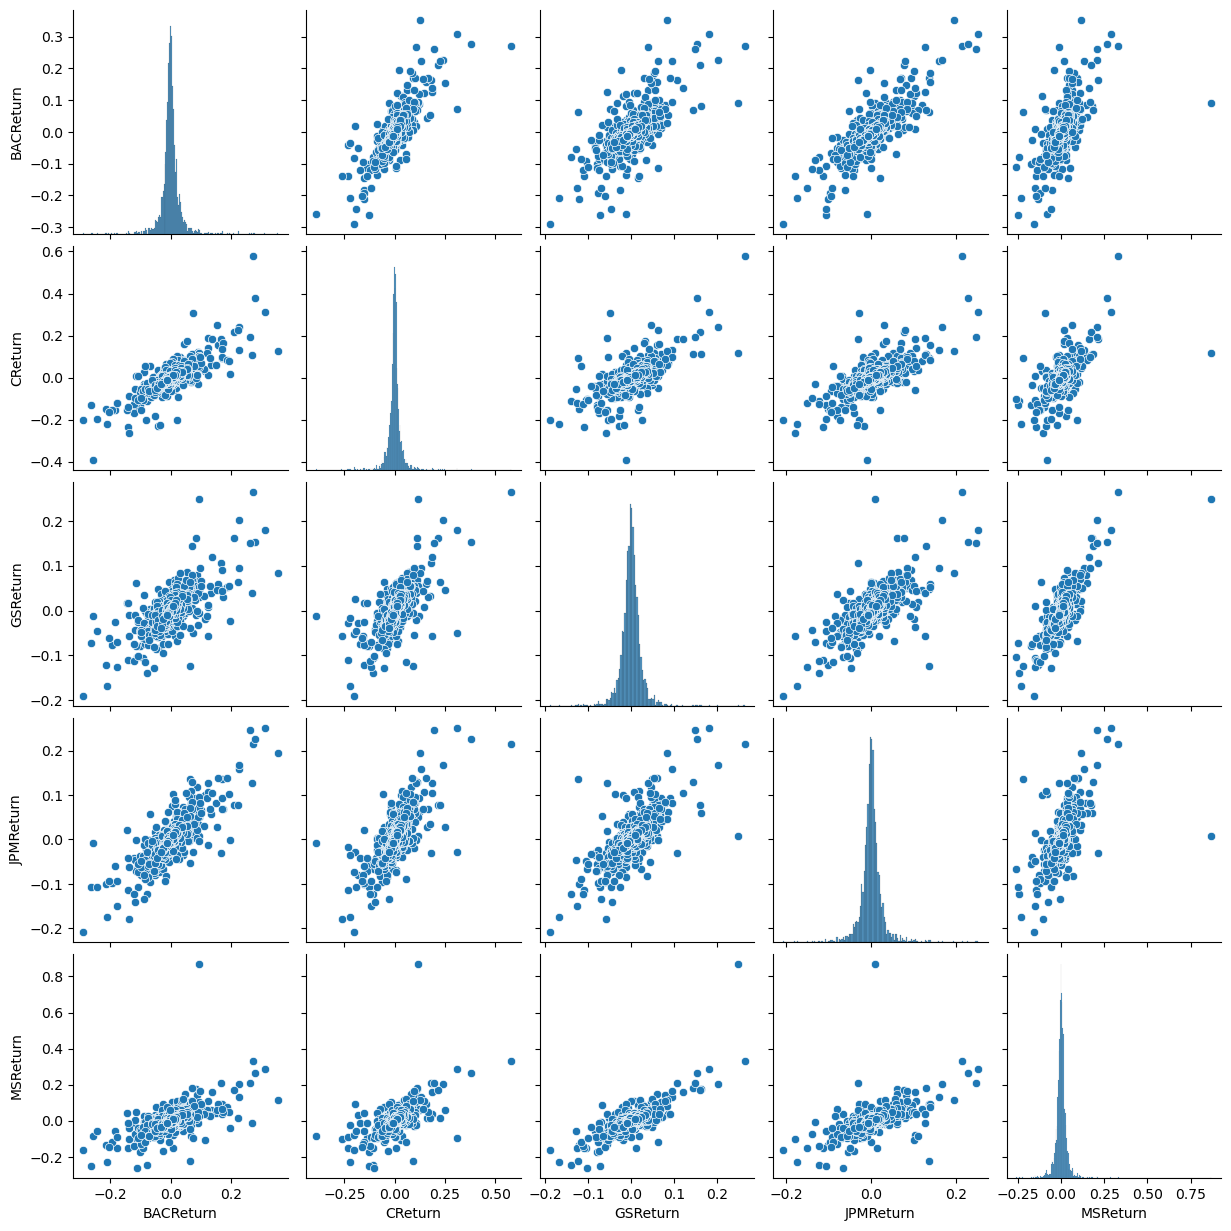

In [92]:
sns.pairplot(returns[1:])

** Using this returns DataFrame, figuring out on what dates each bank stock had the best and worst single day returns.**

In [93]:
returns.idxmin()

BACReturn   2009-01-20
CReturn     2009-02-27
GSReturn    2009-01-20
JPMReturn   2009-01-20
MSReturn    2008-10-09
dtype: datetime64[ns]

In [95]:
returns.idxmax()

BACReturn   2009-04-09
CReturn     2008-11-24
GSReturn    2008-11-24
JPMReturn   2009-01-21
MSReturn    2008-10-13
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns**

In [96]:
returns.std()

BACReturn    0.036647
CReturn      0.038672
GSReturn     0.025390
JPMReturn    0.027667
MSReturn     0.037819
dtype: float64

In [99]:
returns.loc['2015-01-01':'2015-12-31'].std()

BACReturn    0.016163
CReturn      0.015289
GSReturn     0.014046
JPMReturn    0.014017
MSReturn     0.016249
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


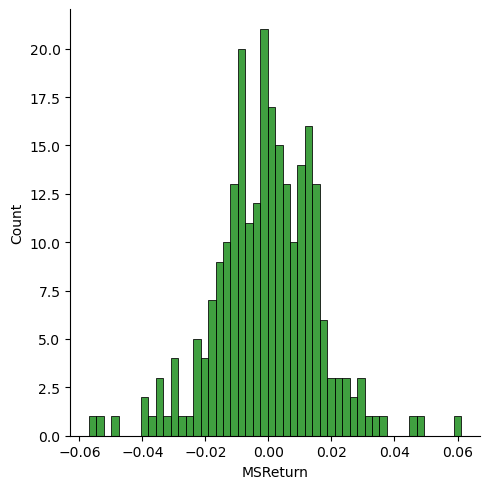

In [102]:
sns.displot(returns.loc['2015-01-01':'2015-12-31']['MSReturn'],color='green',bins = 50)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

C:\Users\Dell\AppData\Local\Temp\ipykernel_13260\1602873538.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='CReturn', ylabel='Density'>

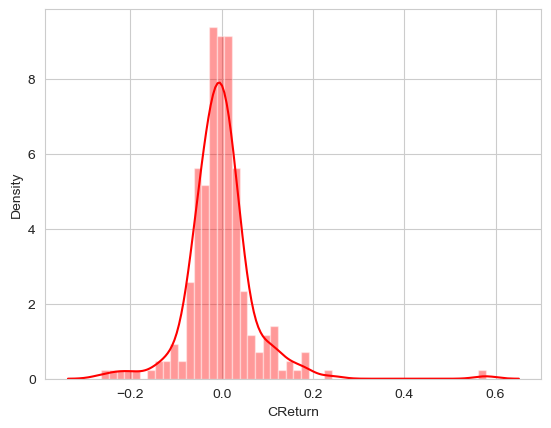

In [136]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['CReturn'],color='red',bins =50)

____
# More Visualization
### Imports

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time.**

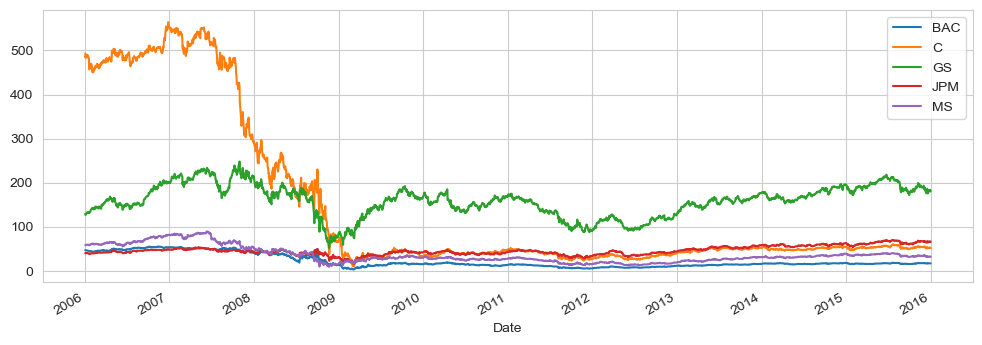

In [106]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label = tick,figsize = (12,4))
plt.legend()

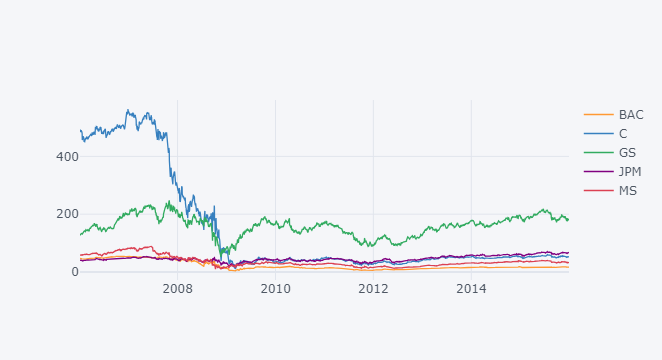

In [108]:
bank_stocks.xs(key = 'Close',axis = 1,level = 'Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Ploting the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

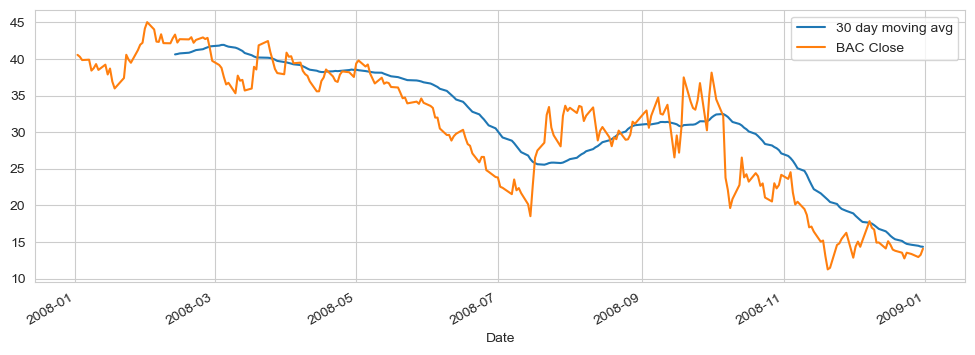

In [113]:
plt.figure(figsize=(12,4))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window = 30).mean().plot(label ='30 day moving avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label = 'BAC Close')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

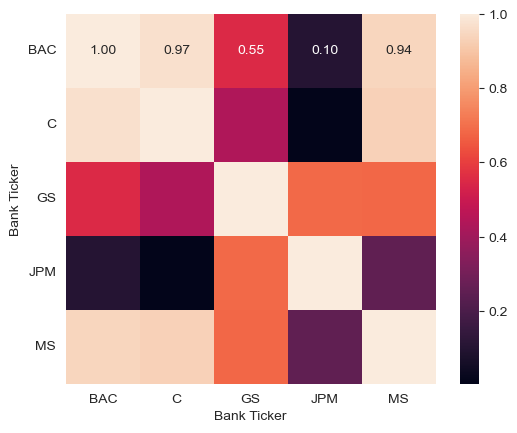

In [122]:
heatmap = sns.heatmap(bank_stocks.xs(key = 'Close',axis = 1,level = 'Stock Info').corr(),annot = True)

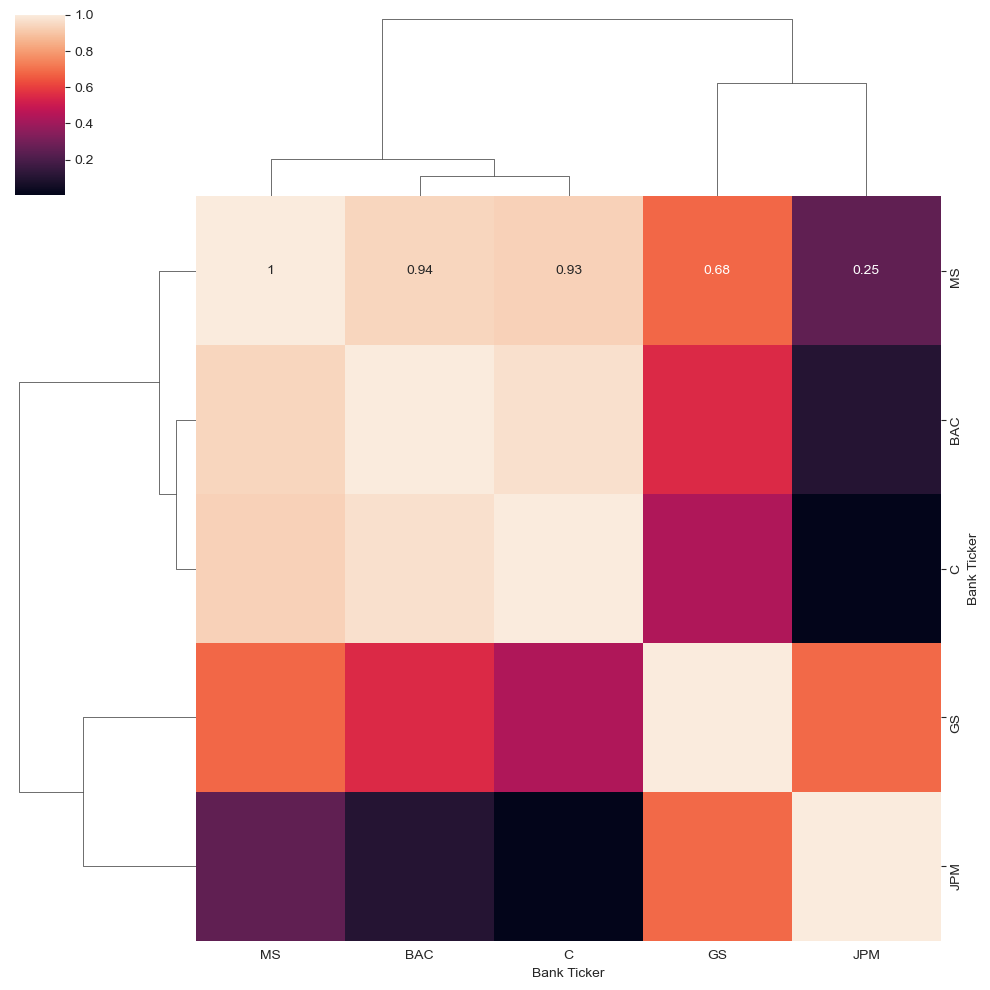

In [123]:
heatmap = sns.clustermap(bank_stocks.xs(key = 'Close',axis = 1,level = 'Stock Info').corr(),annot = True)

In [ ]:
close_corr = bank_stocks.xs(key = 'Close',axis = 1,level = 'Stock Info').corr()

In [ ]:
close_corr.iplot(kind = 'heatmap',colorscale = 'rdylbu')

# Part 2 

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots.

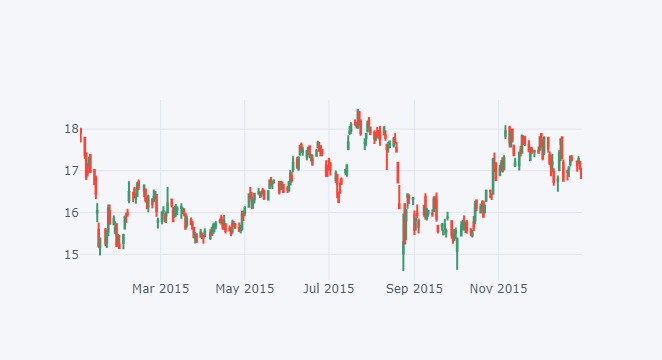

In [137]:
bac15 = BAC[['Open','High','Low','Close']].loc['2015-01-01':'2016-01-01']
bac15.iplot(kind = 'candle')